# Multiple Linear Regression

In [1]:
library("IRdisplay")

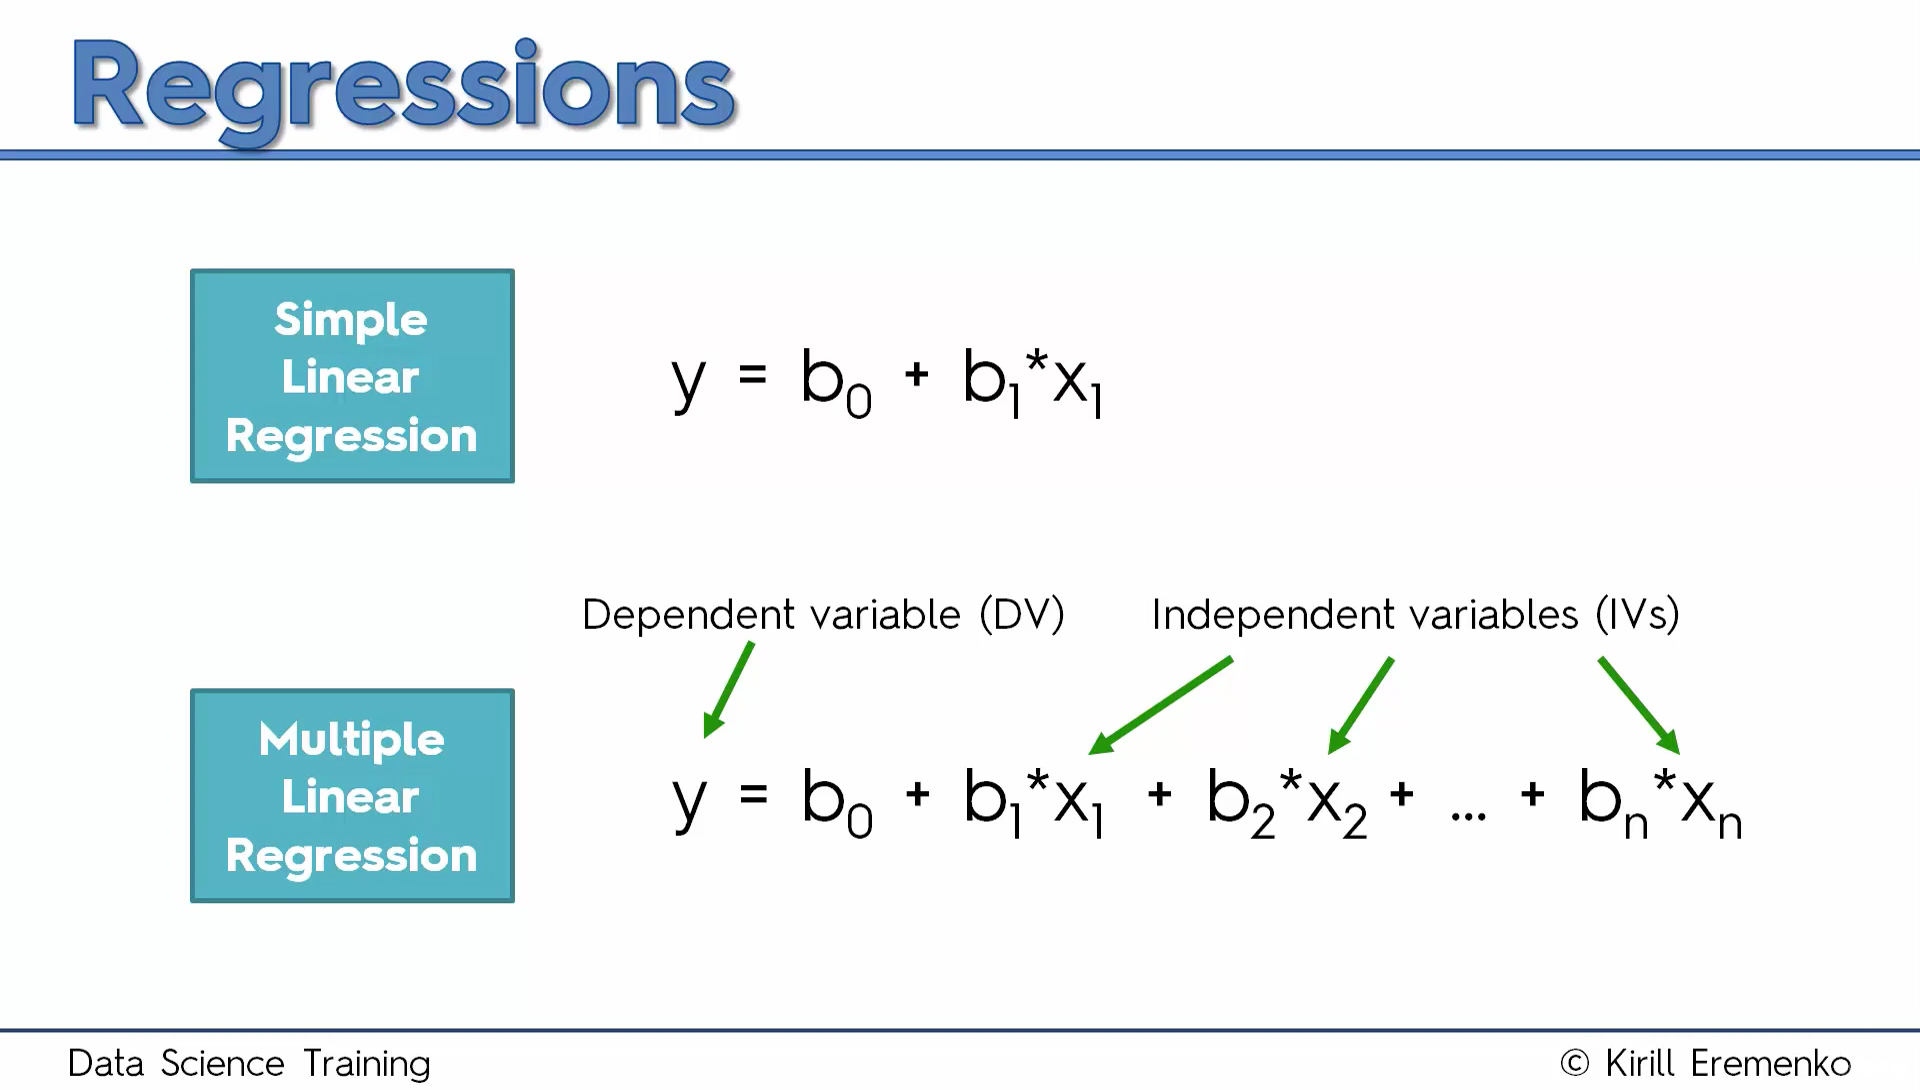

In [2]:
display_png(file="img/01.png")

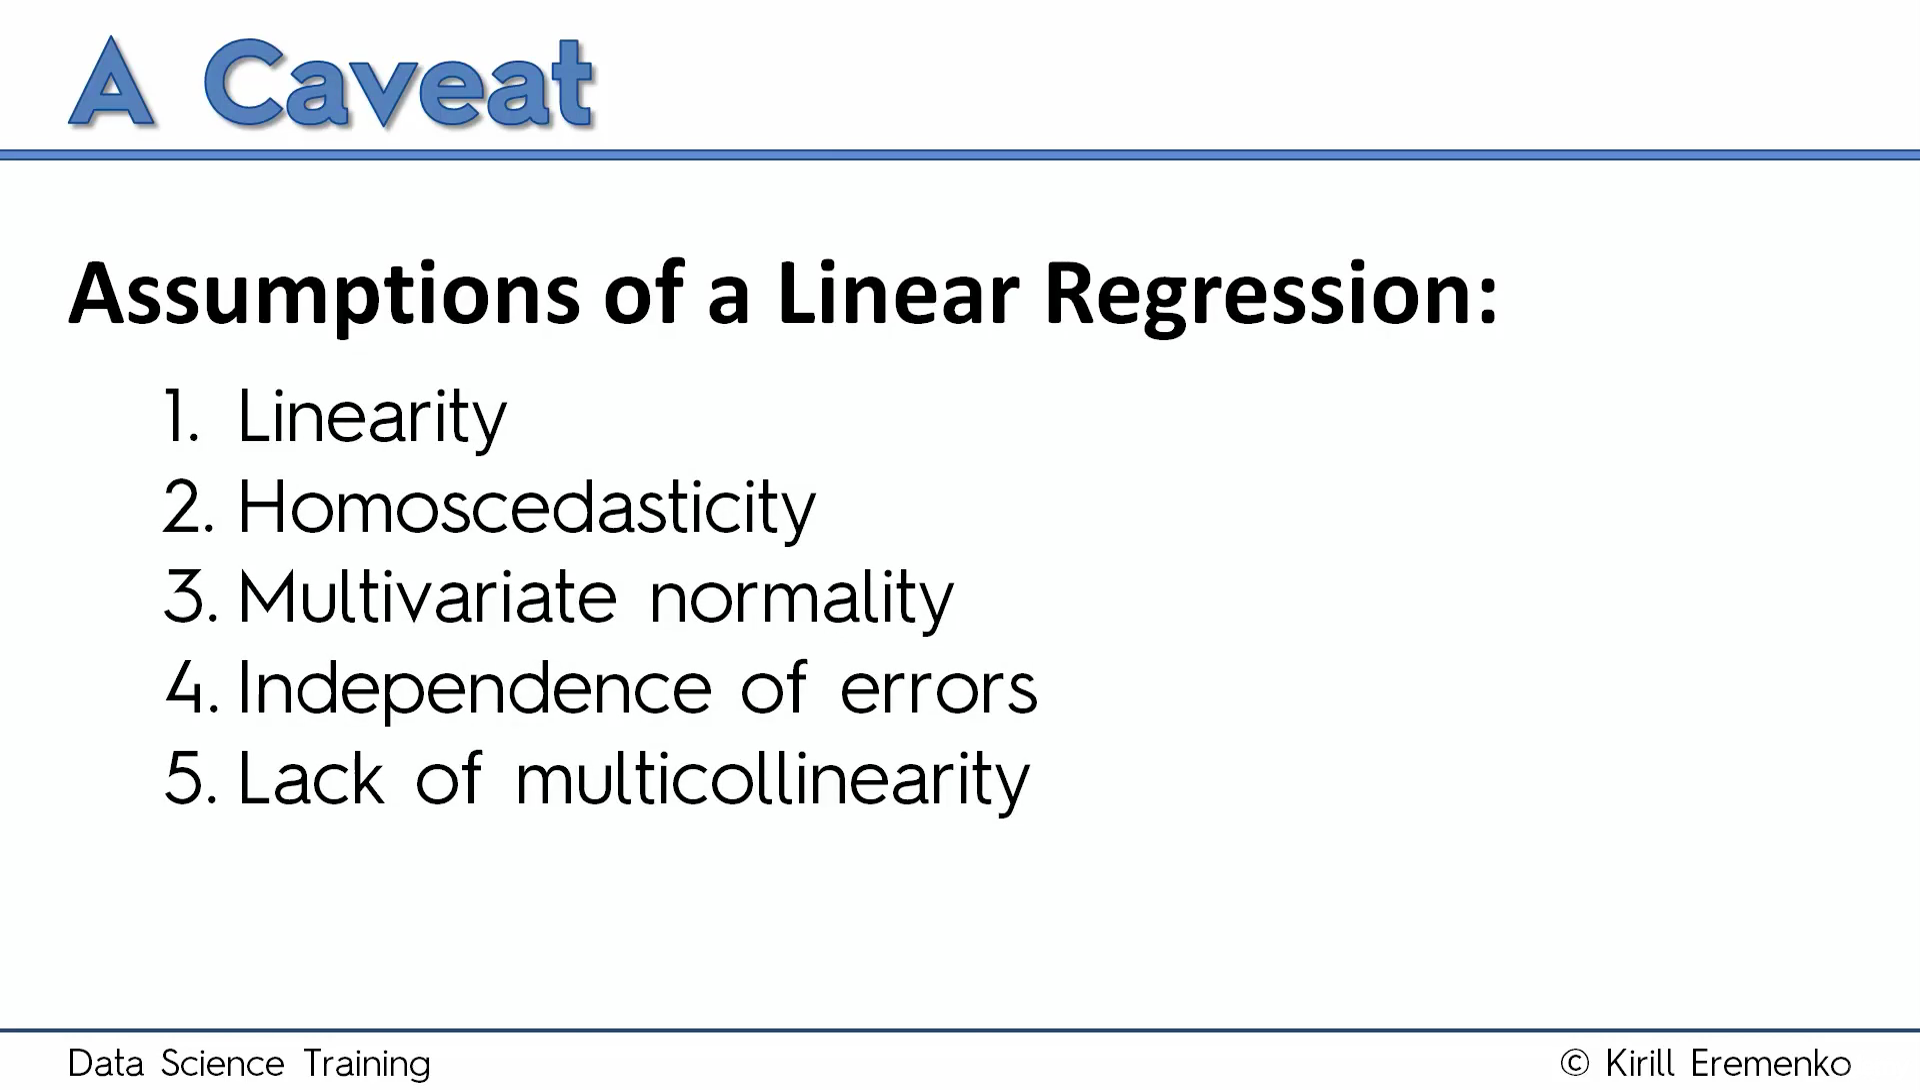

In [3]:
display_png(file="img/02.png")

### Green = Dependent variable
### Blue = Independent variable

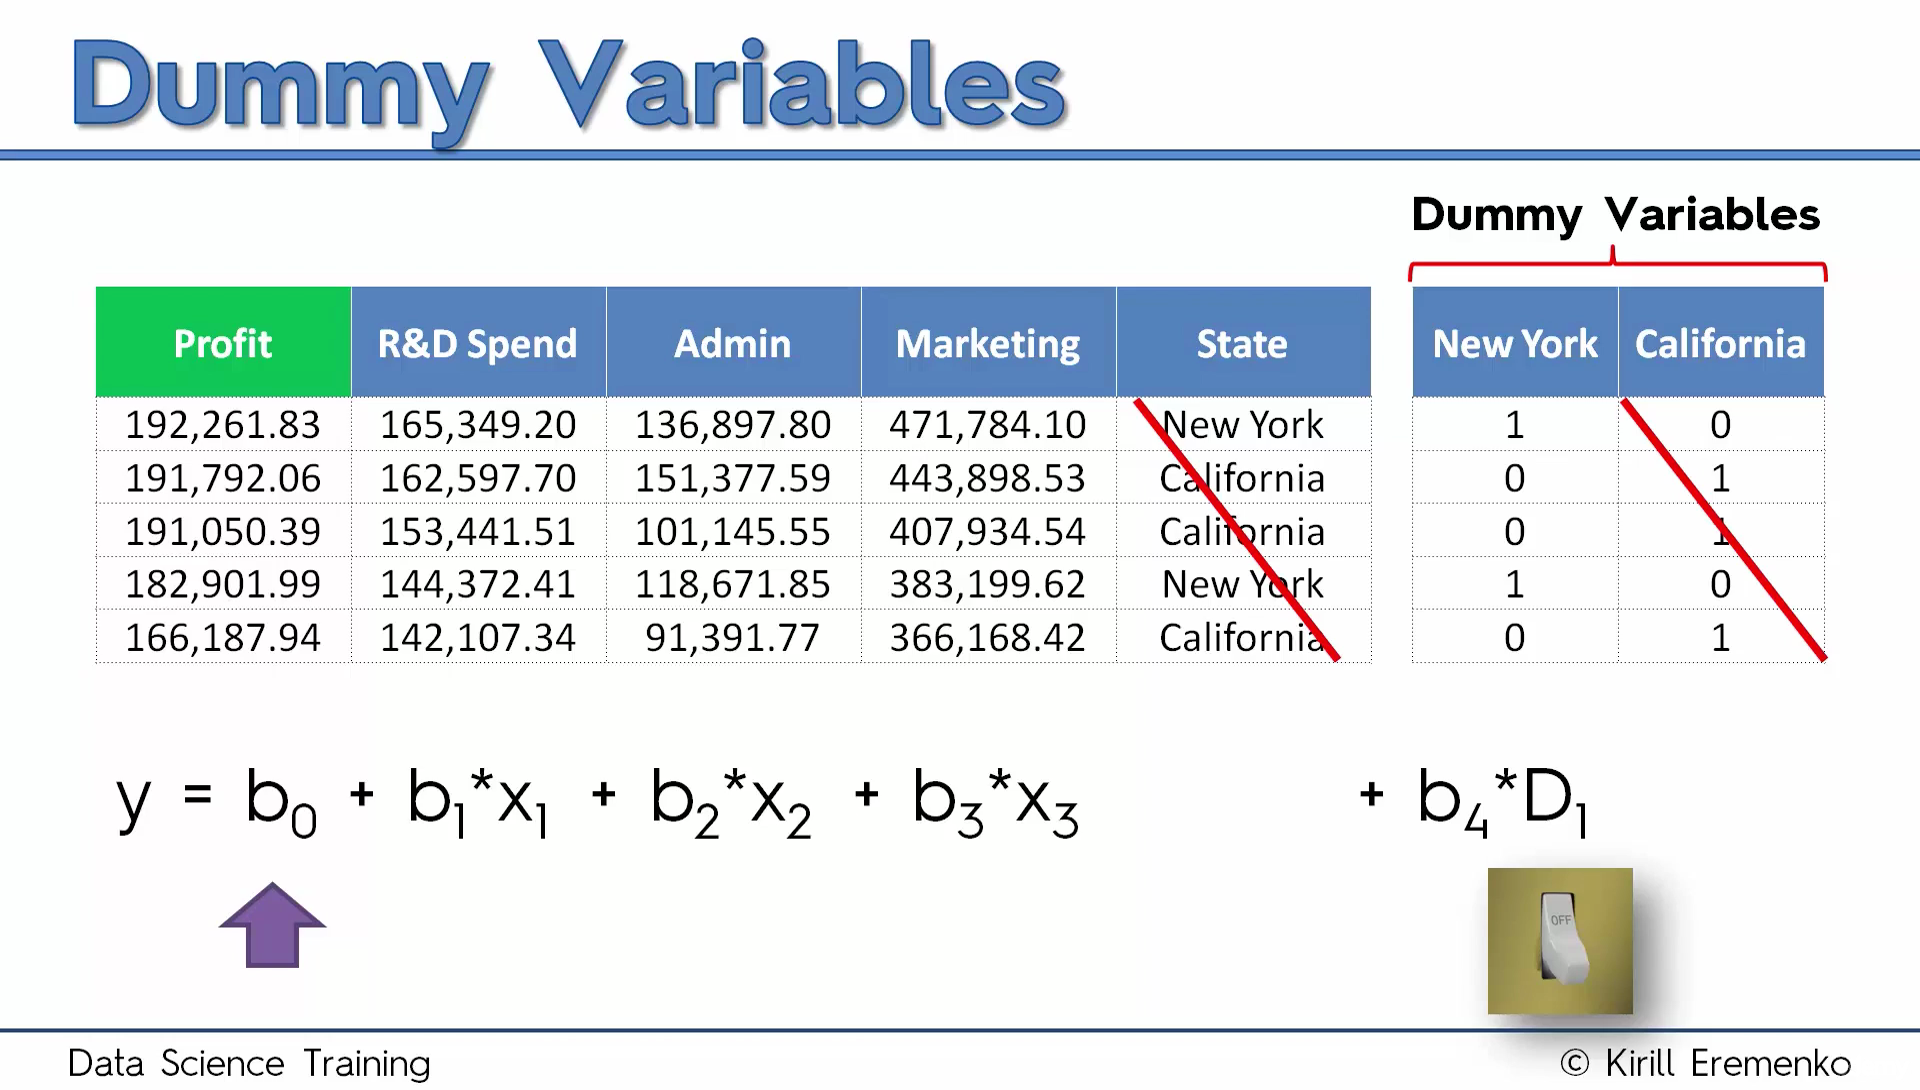

In [4]:
display_png(file="img/03.png")

### Data Preprocessing

In [6]:
# Importing the dataset
dataset = read.csv('50_Startups.csv')

In [7]:
dataset

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.20,136897.80,471784.10,New York,192261.83
162597.70,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.90,99814.71,362861.36,New York,156991.12
134615.46,147198.87,127716.82,California,156122.51
130298.13,145530.06,323876.68,Florida,155752.60
120542.52,148718.95,311613.29,New York,152211.77
123334.88,108679.17,304981.62,California,149759.96


### Encoding categorical data

In [8]:
dataset$State = factor(dataset$State,
                       levels = c('New York', 'California', 'Florida'),
                       labels = c(1, 2, 3))

In [9]:
dataset

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.20,136897.80,471784.10,1,192261.83
162597.70,151377.59,443898.53,2,191792.06
153441.51,101145.55,407934.54,3,191050.39
144372.41,118671.85,383199.62,1,182901.99
142107.34,91391.77,366168.42,3,166187.94
131876.90,99814.71,362861.36,1,156991.12
134615.46,147198.87,127716.82,2,156122.51
130298.13,145530.06,323876.68,3,155752.60
120542.52,148718.95,311613.29,1,152211.77
123334.88,108679.17,304981.62,2,149759.96


In [11]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Profit, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

In [12]:
training_set

,R.D.Spend,Administration,Marketing.Spend,State,Profit
1,165349.20,136897.80,471784.10,1,192261.83
2,162597.70,151377.59,443898.53,2,191792.06
3,153441.51,101145.55,407934.54,3,191050.39
6,131876.90,99814.71,362861.36,1,156991.12
7,134615.46,147198.87,127716.82,2,156122.51
9,120542.52,148718.95,311613.29,1,152211.77
10,123334.88,108679.17,304981.62,2,149759.96
12,100671.96,91790.61,249744.55,2,144259.40
13,93863.75,127320.38,249839.44,3,141585.52
14,91992.39,135495.07,252664.93,2,134307.35


In [13]:
test_set

,R.D.Spend,Administration,Marketing.Spend,State,Profit
4,144372.41,118671.85,383199.62,1,182901.99
5,142107.34,91391.77,366168.42,3,166187.94
8,130298.13,145530.06,323876.68,3,155752.60
11,101913.08,110594.11,229160.95,3,146121.95
16,114523.61,122616.84,261776.23,1,129917.04
20,86419.70,153514.11,0.00,1,122776.86
21,76253.86,113867.30,298664.47,2,118474.03
24,67532.53,105751.03,304768.73,3,108733.99
31,61994.48,115641.28,91131.24,3,99937.59
32,61136.38,152701.92,88218.23,1,97483.56


### Fitting Multiple Linear Regression to the training set

In [24]:
# regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State, 
#                data = training_set)
regressor = lm(formula = Profit ~ ., data = training_set)

In [25]:
summary(regressor)


Call:
lm(formula = Profit ~ ., data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


### Predicting the Test set result

In [26]:
y_pred = predict(regressor, newdata = test_set)

In [27]:
y_pred # Predicted value

4         5         8        11        16        20        21        24 
173981.09 172655.64 160250.02 135513.90 146059.36 114151.03 117081.62 110671.31 
       31        32 
 98975.29  96867.03

In [28]:
test_set$Profit # Real value

[1] 182901.99 166187.94 155752.60 146121.95 129917.04 122776.86 118474.03
 [8] 108733.99  99937.59  97483.56

### Fitting Multiple Linear Regression to the training set using only R & D Spend

In [30]:
regressor = lm(formula = Profit ~ R.D.Spend, data = training_set)
y_pred = predict(regressor, newdata = test_set)
y_pred # Predicted value

4        5        8       11       16       20       21       24 
172647.9 170708.2 160595.5 136288.1 147087.1 123020.5 114315.0 106846.5 
      31       32 
102104.1 101369.2

### Building the optimal model using Backward Elimination

In [33]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State, data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


In [34]:
# Remove State as p_value is highest i.e. p_value>0.05
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33117  -4858    -36   6020  17957 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.970e+04  7.120e+03   6.980 3.48e-08 ***
R.D.Spend        7.983e-01  5.356e-02  14.905  < 2e-16 ***
Administration  -2.895e-02  5.603e-02  -0.517    0.609    
Marketing.Spend  3.283e-02  1.987e-02   1.652    0.107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9629 on 36 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9457 
F-statistic: 227.6 on 3 and 36 DF,  p-value: < 2.2e-16


In [35]:
# Remove Administration as p_value is highest i.e. p_value>0.05
regressor = lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33294  -4763   -354   6351  17693 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.638e+04  3.019e+03  15.364   <2e-16 ***
R.D.Spend       7.879e-01  4.916e-02  16.026   <2e-16 ***
Marketing.Spend 3.538e-02  1.905e-02   1.857   0.0713 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9533 on 37 degrees of freedom
Multiple R-squared:  0.9495,	Adjusted R-squared:  0.9468 
F-statistic: 348.1 on 2 and 37 DF,  p-value: < 2.2e-16


In [36]:
# Remove Administration as p_value is highest i.e. p_value>0.05
regressor = lm(formula = Profit ~ R.D.Spend, data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-34334  -4894   -340   6752  17147 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.902e+04  2.748e+03   17.84   <2e-16 ***
R.D.Spend   8.563e-01  3.357e-02   25.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9836 on 38 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9434 
F-statistic: 650.8 on 1 and 38 DF,  p-value: < 2.2e-16
